In [1]:
 import numpy as np 
import matplotlib.pyplot as plt
import glob
import cv2

from keras.models import Model, Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
import os
import seaborn as sns


In [2]:
!unzip /content/drive/MyDrive/public_dataset/dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: datset/T/Normal/Normal-1394.png  
  inflating: datset/T/Normal/Normal-1395.png  
  inflating: datset/T/Normal/Normal-1396.png  
  inflating: datset/T/Normal/Normal-1397.png  
  inflating: datset/T/Normal/Normal-1398.png  
  inflating: datset/T/Normal/Normal-1399.png  
  inflating: datset/T/Normal/Normal-1400.png  
  inflating: datset/T/Normal/Normal-1401.png  
  inflating: datset/T/Normal/Normal-1402.png  
  inflating: datset/T/Normal/Normal-1403.png  
  inflating: datset/T/Normal/Normal-1404.png  
  inflating: datset/T/Normal/Normal-1405.png  
  inflating: datset/T/Normal/Normal-1406.png  
  inflating: datset/T/Normal/Normal-1407.png  
  inflating: datset/T/Normal/Normal-1408.png  
  inflating: datset/T/Normal/Normal-1409.png  
  inflating: datset/T/Normal/Normal-1410.png  
  inflating: datset/T/Normal/Normal-1411.png  
  inflating: datset/T/Normal/Normal-1412.png  
  inflating: datset/T/Normal/Normal-1413.png  
  inflati

In [3]:
train_path="datset/T"
val_path="datset/V"

In [4]:
for directory_path in glob.glob("datset/T/*"):
    label = directory_path.split("\\")[-1]
    print(label)

datset/T/pneumonia
datset/T/covid+
datset/T/Normal


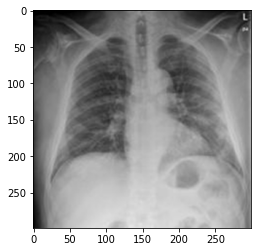

In [5]:
import glob
import cv2
import matplotlib.pyplot as plt
file="datset/V/covid+/COVID-520.png"
image= cv2.imread(file)
plt.imshow(image)

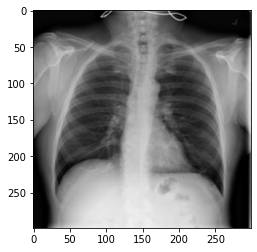

In [6]:
file="datset/V/Normal/Normal-19.png"
image= cv2.imread(file)
plt.imshow(image)

In [7]:
import os

list = os.listdir('datset/T/covid+') # dir is your directory path
TP= len(list)
print (TP)

3076


In [8]:
list = os.listdir('datset/T/Normal') # dir is your directory path
TN= len(list)
print (TN)

2964


In [9]:
trainingdata=TP+TN;

In [10]:
list = os.listdir('datset/V/covid+') # dir is your directory path
TestP= len(list)
print (TestP)
list = os.listdir('datset/V/Normal') # dir is your directory path
TestN= len(list)
print (TestN)
testdata=TestP+TestN;

540
540


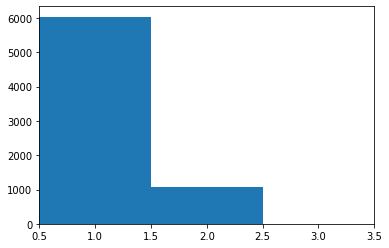

In [11]:
import matplotlib.pyplot as plt

fig = plt.figure()
s = fig.add_subplot(111)
s.bar([1, 2], [trainingdata,testdata], width=1)
s.set_xlim(0.5, 3.5)
fig.savefig('t.png')

In [12]:
from keras.applications.resnet_v2 import ResNet101V2
from keras.applications.resnet_v2  import preprocess_input

In [13]:

IMAGE_SIZE = [224, 224]
resnet_v2 = ResNet101V2(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)


171327488/171317808 [==============================] - 1s 0us/step


In [14]:
resnet_v2 .input

<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_1')>

In [16]:
for layer in resnet_v2 .layers:
  layer.trainable = False

In [17]:

x = Flatten()(resnet_v2 .output)
prediction = Dense(3, activation='softmax')(x)
model = Model(inputs=resnet_v2 .input, outputs=prediction)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 114, 114, 64) 0           conv1_conv[0][0]                 
______________________________________________________________________________________________

In [18]:
from keras import optimizers


adam = optimizers.Adam(0.0001)
model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

In [19]:

# Image Data Augmentation
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [20]:

test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [23]:
train_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 7253 images belonging to 3 classes.


In [24]:
test_set = test_datagen.flow_from_directory(val_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 1212 images belonging to 3 classes.


In [25]:
from datetime import datetime
from keras.callbacks import ModelCheckpoint



checkpoint = ModelCheckpoint(filepath='inceptionv2.h5', 
                               verbose=2, save_best_only=True)

callbacks = [checkpoint]

start = datetime.now()

model_history=model.fit_generator(
  train_set,
  validation_data=test_set,
  epochs=10,
  validation_steps=2,
  callbacks=callbacks ,verbose=2)


duration = datetime.now() - start
print("Training completed in time: ", duration)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
227/227 - 169s - loss: 0.6343 - accuracy: 0.7871 - val_loss: 0.6911 - val_accuracy: 0.8438

Epoch 00001: val_loss improved from inf to 0.69114, saving model to inceptionv2.h5


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/10
227/227 - 100s - loss: 0.4894 - accuracy: 0.8406 - val_loss: 0.5562 - val_accuracy: 0.8594

Epoch 00002: val_loss improved from 0.69114 to 0.55618, saving model to inceptionv2.h5
Epoch 3/10
227/227 - 99s - loss: 0.4371 - accuracy: 0.8610 - val_loss: 0.2340 - val_accuracy: 0.9375

Epoch 00003: val_loss improved from 0.55618 to 0.23398, saving model to inceptionv2.h5
Epoch 4/10
227/227 - 99s - loss: 0.4135 - accuracy: 0.8744 - val_loss: 0.1250 - val_accuracy: 0.9062

Epoch 00004: val_loss improved from 0.23398 to 0.12500, saving model to inceptionv2.h5
Epoch 5/10
227/227 - 99s - loss: 0.4144 - accuracy: 0.8700 - val_loss: 0.4235 - val_accuracy: 0.8750

Epoch 00005: val_loss did not improve from 0.12500
Epoch 6/10
227/227 - 97s - loss: 0.3846 - accuracy: 0.8827 - val_loss: 0.4684 - val_accuracy: 0.9062

Epoch 00006: val_loss did not improve from 0.12500
Epoch 7/10
227/227 - 99s - loss: 0.4002 - accuracy: 0.8809 - val_loss: 0.5069 - val_accuracy: 0.8594

Epoch 00007: val_loss di

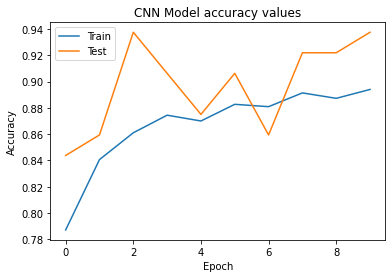

In [26]:

plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('CNN Model accuracy values')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

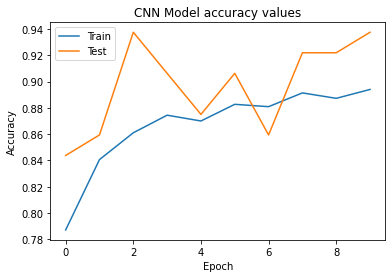

In [27]:

plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('CNN Model accuracy values')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [28]:
import matplotlib.pyplot as plt
import itertools 

#by https://sites.google.com/view/amarnath-r/keras-deep-learning-image-classification-a-simple-example

def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):

    """

    This function prints and plots the confusion matrix.

    Normalization can be applied by setting `normalize=True`.

    """

    plt.figure(figsize=(5,5))



    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    
    plt.title(title)

    plt.colorbar()



    tick_marks = np.arange(len(classes))

    plt.xticks(tick_marks, classes, rotation=45)

    plt.yticks(tick_marks, classes)



    if normalize:

        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

        cm = np.around(cm, decimals=2)

        cm[np.isnan(cm)] = 0.0

        print("Normalized confusion matrix")

    else:

        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):

        plt.text(j, i, cm[i, j],

                 horizontalalignment="center",

                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()

    plt.ylabel('True label')

    plt.xlabel('Predicted label')

In [29]:
classes=["COVID",  "Normal","pneumonia"]

In [30]:
resnet101v2model=model

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1976: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Confusion Matrix 
Normalized confusion matrix
Confusion matrix, without normalization


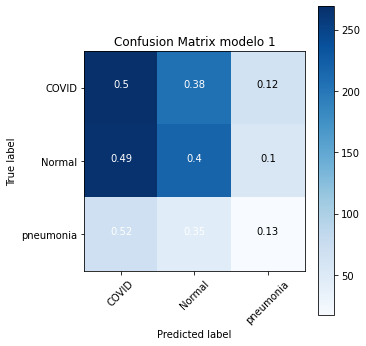

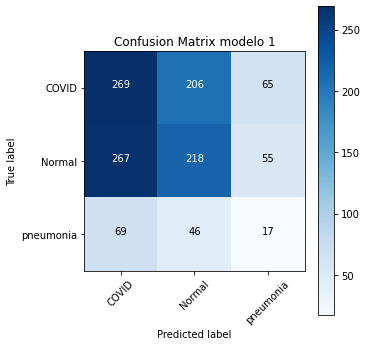

In [31]:
from sklearn.metrics import classification_report, confusion_matrix

Y_pred =  resnet101v2model.predict_generator(test_set)

y_pred = np.argmax(Y_pred, axis=1)

print('Confusion Matrix ')

cm = confusion_matrix(test_set.classes, y_pred)
plot_confusion_matrix(cm, classes, title='Confusion Matrix modelo 1')
plot_confusion_matrix(cm, classes,False, title='Confusion Matrix modelo 1')

In [34]:
from sklearn.metrics import classification_report
import pandas as pd

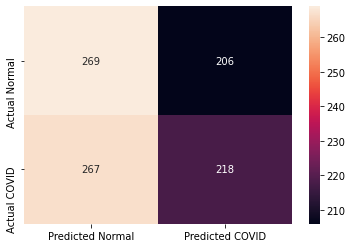

In [35]:
from sklearn.metrics import classification_report,confusion_matrix
cm = pd.DataFrame(data=confusion_matrix(test_set.classes, y_pred, labels=[0, 1]),index=["Actual Normal", "Actual COVID"],
columns=["Predicted Normal", "Predicted COVID"])
import seaborn as sns
sns.heatmap(cm,annot=True,fmt="d")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')